<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_6913/NGC_6913.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [1]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install astroquery

     |████████████████████████████████| 4.5MB 4.8MB/s 
     |████████████████████████████████| 2.7MB 39.0MB/s 
  Created wheel for astroquery: filename=astroquery-0.4-cp36-none-any.whl size=3582510 sha256=233eb96fc5081c4ec221f423a8cf7bc726a0b96dba192df4ee5fb24241774891
  Stored in directory: /root/.cache/pip/wheels/a3/6d/9d/f6ceddc68de0e4b7a64b56d6e8c8075e6ef6377ec9c05ce128
Successfully built astroquery


In [3]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [4]:
## making a GAIA cone_search of 30m radius around NGC6913 center

coordinate = coord.SkyCoord.from_name('NGC6913')
print(coordinate)
radius = u.Quantity(0.5, u.deg)
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (305.98333333, 38.52333333)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [5]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: TableReplaceWarning: converted column 'priam_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: TableReplaceWarning: converted column 'flame_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,b'Gaia DR2 2061130135063018368',2061130135063018368,659634151,2015.5,305.979910,0.332861,38.522535,0.301018,0.373794,0.412532,0.906096,-5.100601,0.812966,-8.181460,0.579568,-0.017581,0.084075,0.098068,0.034593,0.372245,0.010567,-0.133693,-0.021647,0.017277,0.016911,242,0,241,1,2.371331,290.591705,0.973766,1.042753,31,False,0.092856,1.314335,0.090345,-0.025863,...,374.200125,6.729877,55.602821,18.329161,1.700114,0,2.624422,1.276796,1.347626,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',76.913312,0.606578,324.067662,55.412832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.002802
1,1635721458409799680,b'Gaia DR2 2061130169422135168',2061130169422135168,1047410342,2015.5,305.986649,0.551148,38.524911,0.562689,-0.757284,0.713565,-1.061268,-4.351111,1.294378,-4.469651,1.147469,-0.314511,-0.306406,-0.143730,0.110184,0.285002,0.082362,-0.386891,0.024789,0.077053,-0.019642,214,0,213,1,2.072794,252.446564,0.397076,0.062603,31,False,0.039263,1.379358,0.144610,0.042972,...,195.589708,10.444030,18.727419,19.033554,1.842011,0,2.083460,0.738298,1.345161,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',76.918285,0.603627,324.077848,55.412826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.003028
2,1635721458409799680,b'Gaia DR2 2061130173719911552',2061130173719911552,1630697475,2015.5,305.987777,1.436923,38.525853,1.461241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.015759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88,0,88,0,-1.281829,66.976456,0.000000,0.000000,3,False,0.013401,NaN,NaN,0.052217,...,110.490162,15.678766,7.047121,19.653610,2.215422,0,1.295437,-0.038664,1.334101,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',76.919563,0.603446,324.079948,55.413321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.004285
3,1635721458409799680,b'Gaia DR2 2061130135061358080',2061130135061358080,1539788148,2015.5,305.977852,0.159351,38.523700,0.167229,0.232010,0.214437,1.081950,-3.257656,0.385975,-5.809052,0.344036,-0.101113,-0.028410,-0.068365,0.028975,0.305656,0.019233,-0.077661,-0.029386,0.035019,0.039842,263,0,262,1,1.800683,299.285553,0.564693,1.225498,31,False,0.305587,1.323049,0.046636,0.036019,...,712.860518,10.730518,66.433006,17.629408,1.514112,0,2.449070,1.252272,1.196798,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',76.913341,0.608565,324.065922,55.414556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.004309
4,1635721458409799680,b'Gaia DR2 2061130169422134016',2061130169422134016,1167108254,2

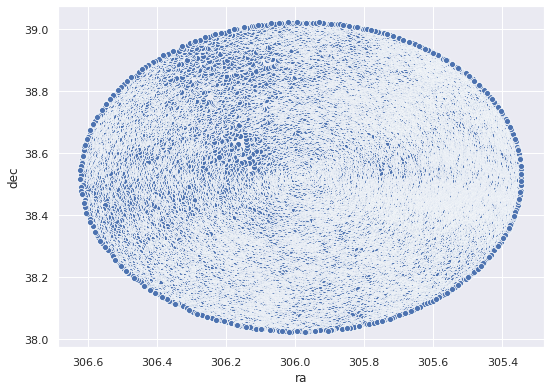

In [6]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(all_stars['ra'], all_stars['dec'])
skyplot.invert_xaxis()

#### Finding Cantat Data

In [7]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [8]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
catalogs

TableList with 2 tables:
	'0:J/A+A/633/A99/table1' with 20 column(s) and 1481 row(s) 
	'1:J/A+A/633/A99/members' with 13 column(s) and 435833 row(s) 

In [0]:
## saving the whole cantat table 
## comment out the next two line if you want to save the full cantat table

# cantat_all = catalogs['J/A+A/633/A99/members'].to_pandas()
# cantat_all.to_csv('cantat_all.csv')

In [0]:
# help(Vizier)

In [11]:
## saving only NGC 6913 data from Cantat

cantat_6913 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_6913")
cantat_6913 = cantat_6913[0].to_pandas()
cantat_6913

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,305.969238,38.303085,2061114643120061952,0.5934,-3.488,-5.897,NaN,15.447200,1.6735,0.8,b'NGC_6913',305.969258,38.303110
1,305.871156,38.486870,2061130551679058432,0.5344,-3.476,-5.747,NaN,14.504200,1.0105,0.8,b'NGC_6913',305.871175,38.486895
2,305.916894,38.295450,2061115021077207296,0.5359,-3.500,-5.608,NaN,15.938500,1.7948,0.4,b'NGC_6913',305.916914,38.295474
3,305.943575,38.655508,2061158176909306496,0.5496,-3.072,-5.630,NaN,13.786300,1.3860,0.7,b'NGC_6913',305.943591,38.655532
4,305.729983,38.379210,2061125363358595200,0.5688,-3.459,-5.879,NaN,14.523400,1.3140,1.0,b'NGC_6913',305.730002,38.379235
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,305.693412,38.581854,2061180579450262656,0.5195,-3.086,-6.098,NaN,16.030199,1.6694,0.1,b'NGC_6913',305.693429,38.581881
166,305.710603,38.650615,2061181571589836544,0.5638,-3.211,-5.658,NaN,17.743799,1.9652,0.5,b'NGC_6913',305.710621,38.650640
167,305.830998,38.732448,2061206413680783488,0.4924,-3.305,-5.605,NaN,17.912500,2.3891,0.2,b'NGC_6913',305.831016,38.732472
168,306.214730,38.283003,2058109815277535616,0.5582,-3.076,-5.901,NaN,16.621000,2.3549,0.1,b'NGC_6913',306.214747,38.283028


In [0]:
# renaming the cantat table to match it with gaia_data
cantat_6913 = cantat_6913.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [0]:
# taking the subset of only source_id and PMemb
cantat_6913 = cantat_6913.loc[:,['source_id', 'PMemb']]


In [0]:
# join the two table on source_id
cantat_6913 = all_stars.join(cantat_6913.set_index('source_id'), on='source_id')

In [15]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_6913 = cantat_6913.dropna(subset=['PMemb'])
cantat_6913

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb
29,1635721458409799680,b'Gaia DR2 2061130139362333824',2061130139362333824,954418691,2015.5,305.990473,0.013010,38.514351,0.014309,0.542993,0.017657,30.752131,-3.402550,0.029173,-5.793631,0.029298,-0.121473,0.013768,-0.120340,-0.001874,0.249431,-0.026708,-0.117860,-0.100446,-0.117522,-0.106875,275,0,275,0,-4.420243,179.250107,0.000000,0.000000,31,False,68.874550,1.517808,0.003702,0.051634,...,29.533824,1520.282715,13.131310,1.262399,1,1.257004,0.546887,0.710116,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',76.911361,0.595112,324.074993,55.401971,100002.0,4813.937012,4715.242676,4982.020020,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,4.187072,3.909311,4.364184,8.482368,7.701898,9.262839,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.010579,0.9
39,1635721458409799680,b'Gaia DR2 2061130173722072320',2061130173722072320,1141266204,2015.5,305.998644,0.033662,38.527390,0.022625,0.507027,0.034273,14.793980,-3.190718,0.081669,-5.637011,0.045854,-0.146535,-0.394684,0.417441,0.130678,0.264738,-0.031606,-0.128072,-0.211356,-0.191511,0.091486,197,0,196,1,-1.613617,160.571564,0.000000,0.000000,31,False,21.751890,1.494739,0.007018,0.083249,...,113.073517,141.729538,14.249866,1.320299,0,1.387800,0.584863,0.802938,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',76.925706,0.597371,324.094710,55.411221,100001.0,4492.000000,4425.500000,4906.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,3.112038,2.608971,3.206267,3.552577,2.987486,4.117669,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.012639,0.7
59,1635721458409799680,b'Gaia DR2 2061130070642666880',2061130070642666880,1477295721,2015.5,305.989576,0.021783,38.509626,0.021940,0.537889,0.028150,19.107899,-3.441772,0.044039,-5.877576,0.043456,-0.133816,0.108276,-0.140303,-0.061589,0.237611,-0.103821,-0.083638,-0.247389,-0.068452,-0.057484,248,248,247,1,0.012927,241.617935,0.000000,0.000000,31,True,240.833008,1.551702,0.006401,0.109116,...,107.136988,1221.703003,11.969657,1.245247,0,1.129319,0.480597,0.648722,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',76.907090,0.592971,324.070442,55.397954,100001.0,4938.652344,4866.310059,5085.106934,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,6.942542,6.548400,7.150491,25.832445,23.617132,28.047758,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.014555,1.0
81,1635721458409799680,b'Gaia DR2 2061130100701594752',2061130100701594752,1037082205,2015.5,305.998585,0.070253,38.510091,0.079943,0.526576,0.095286,5.526245,-3.564348,0.164491,-5.650762,0.176258,-0.126325,0.011177,-0.093192,0.009505,0.082709,-0.016679,-0.284162,-0.148596,0.030191,-0.072290,247,0,247,0,2.805028,308.320526,0.354874,2.568195,31,False,1.535858,1.357920,0.020578,0.124196,...,20.165911,119.616310,16.305899,1.429119,0,2.239937,1.140545,1.099392,NaN,NaN,0,NaN,Na

In [0]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_6913.to_csv('NGC_6913_cantat.csv')
# all_stars.to_csv('NGC_6913_Gaia_30m.csv')

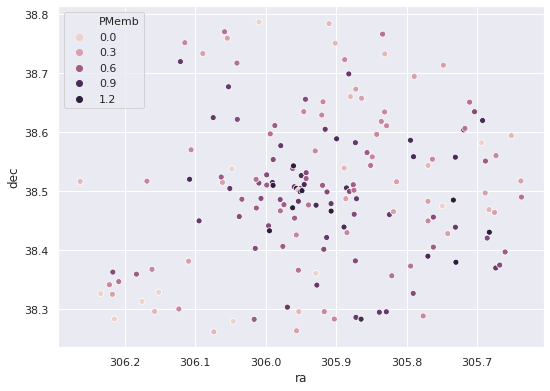

In [17]:
## plotting the skyplot 

skyplot = sns.scatterplot(cantat_6913['ra'], cantat_6913['dec'], hue = cantat_6913['PMemb'])
skyplot.invert_xaxis()

### Examining the Training Data

Separating the predictors (features) and the output (target, here PMemb) from the dataset and train the random forest model.

In [0]:
# import member dataset
member = cantat_6913

In [19]:
# Examining the descriptive statistics of each column
# (Notice BP-RP column has 9 less observation)
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb
count,1.700000e+02,1.700000e+02,1.700000e+02,170.0,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.0,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,169.000000,170.000000,1.690000e+02,169.000000,169.000000,169.000000,169.000000,170.000000,169.000000,169.000000,169.000000,1.000000,1.000000,170.000000,1.0,1.0,1.0,170.000000,170.000000,170.000000,170.000000,145.000000,145.000000,145.000000,145.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,144.0,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,170.000000,170.000000
mean,1.635721e+18,2.061104e+18,8.991247e+08,2015.5,305.916874,0.030140,38.498505,0.036322,0.549987,0.041139,18.595560,-3.380745,0.067076,-5.764726,0.074174,-0.052862,0.047154,-0.138174,-0.051963,0.178949,-0.087508,-0.279096,-0.162469,-0.028793,-0.032876,261.029412,31.388235,259.623529,1.405882,-0.452034,251.052277,0.048083,0.398448,31.0,57.397316,1.461027,0.009230,0.062775,29.729412,16.105882,...,15.843094,28.100000,7.444622e+04,113.394450,690.067383,14.236567,1.320751,0.176471,1.606532,0.757240,0.849291,-17.989237,5.377616,0.035294,5000.0,3.0,0.0,76.865400,0.633193,323.971153,55.411141,100001.193103,4521.335938,4340.726562,4858.288574,2.151746,1.871649,2.629261,1.076579,0.928603,1.343582,200111.0,4.154220,3.680255,4.482897,15.790257,14.470527,17.109993,0.155467,0.561765
std,0.000000e+00,3.270528e+14,4.883002e+08,0.0,0.142852,0.021423,0.125399,0.026414,0.031147,0.028844,8.643813,0.162431,0.048570,0.184031,0.055731,0.074475,0.128318,0.103372,0.062765,0.135922,0.061610,0.135682,0.085144,0.094080,0.076245,22.651574,86.893881,22.167718,2.222790,3.340387,79.192787,0.099826,1.263057,0.0,97.824677,0.079588,0.006703,0.040093,2.543762,0.979355,...,1.920318,4.361817,3.264491e+05,603.299153,393.197235,1.571638,0.072689,0.397521,0.452540,0.271826,0.183238,NaN,NaN,0.460179,NaN,NaN,NaN,0.113765,0.123647,0.190410,0.128638,0.396102,556.623779,550.933777,521.955872,0.770660,0.725869,0.540000,0.391130,0.365506,0.281625,0.0,3.504805,3.357561,3.662597,61.949299,57.375221,66.523674,0.085152,0.257680
min,1.635721e+18,2.058110e+18,1.723005e+06,2015.5,305.636921,0.011508,38.261299,0.013074,0.479977,0.015596,3.813220,-3.740193,0.025444,-6.255921,0.027417,-0.256366,-0.394684,-0.369383,-0.213974,-0.214332,-0.228630,-0.749702,-0.336544,-0.197922,-0.274328,197.000000,0.000000,196.000000,0.000000,-8.638947,106.939201,0.000000,0.000000,31.0,0.85

In [20]:
# correlation of PMemb with other variables
member.corr().PMemb.dropna().sort_values()

dec_error                         -0.500237
astrometric_pseudo_colour_error   -0.490310
parallax_error                    -0.489251
pmra_error                        -0.485249
pmdec_error                       -0.483556
                                     ...   
phot_g_mean_flux_over_error        0.389698
astrometric_pseudo_colour          0.414385
phot_bp_mean_flux_over_error       0.457838
parallax_over_error                0.520014
PMemb                              1.000000
Name: PMemb, Length: 84, dtype: float64

In [0]:
### adding their distance from the center of the clusters

## NGC 6913
center = coord.SkyCoord.from_name('NGC6913')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( (member['ra'] - center_ra)**2 + (member['dec'] - center_dec)**2 )
member['dist_6913_center'] = distance

In [0]:
# Choosing the predictors
# Usual Parameters

feature_columns = ['ra', 'dec', 'ra_error', 'dec_error', 
                   'parallax', 'parallax_error', 'parallax_over_error',
                   'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
                   'phot_g_mean_mag', 'bp_rp', 'dist_6913_center']

features = member.loc[:,feature_columns]
targets = member['PMemb']

In [23]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64 as the built-in radom forest package 
# don't take 64-bit-float
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,ra,dec,ra_error,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,bp_rp,dist_6913_center
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,305.917908,38.498638,0.029798,0.035863,0.549968,0.040668,18.678488,-3.381058,0.066344,-5.763805,0.073269,15.085861,1.606532,0.176929
std,0.142686,0.125758,0.021019,0.025805,0.031239,0.028266,8.601405,0.162863,0.047762,0.184186,0.054631,1.712099,0.452540,0.098025
min,305.636932,38.261299,0.011508,0.013074,0.479977,0.015596,3.813220,-3.740193,0.025444,-6.255921,0.027417,9.085919,0.745669,0.011474
25%,305.828400,38.420197,0.016637,0.019905,0.529116,0.022710,10.646407,-3.502524,0.035387,-5.886963,0.038697,14.172142,1.218687,0.088261
50%,305.919342,38.501030,0.020164,0.023917,0.550231,0.027264,19.433220,-3.408704,0.044384,-5.765985,0.047536,15.083694,1.557216,0.177811
75%,305.998657,38.576851,0.034347,0.042404,0.567951,0.047523,25.101479,-3.252255,0.075709,-5.650763,0.086626,16.237053,1.994548,0.262372
max,306.263489,38.786560,0.111827,0.119171,0.625788,0.142667,37.949947,-2.978666,0.236155,-5.313879,0.238653,17.991703,2.665430,0.348816


In [0]:
# Profile report of the full training_set
# pd_prof.ProfileReport(training_set)

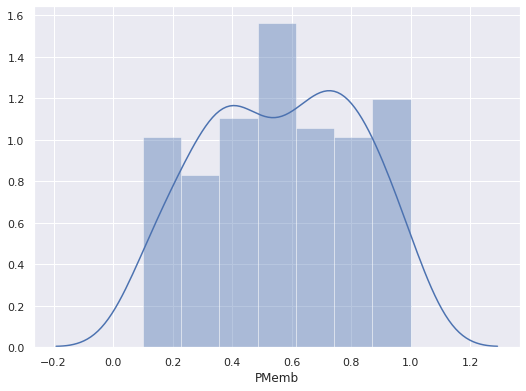

In [25]:
# histogram of PMemb in the training data
sns.distplot(training_set['PMemb'])
plt.show()

In [26]:
# Probable members (PMemb >= 0.5) in this dataset
len(training_set[training_set['PMemb'] >= 0.5])

105

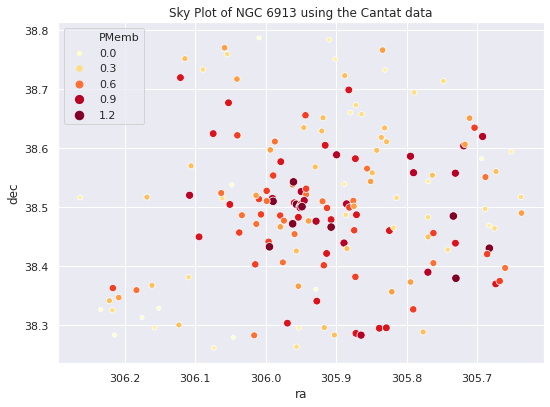

In [27]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
skyplot.invert_xaxis()
plt.title('Sky Plot of NGC 6913 using the Cantat data')
plt.show()

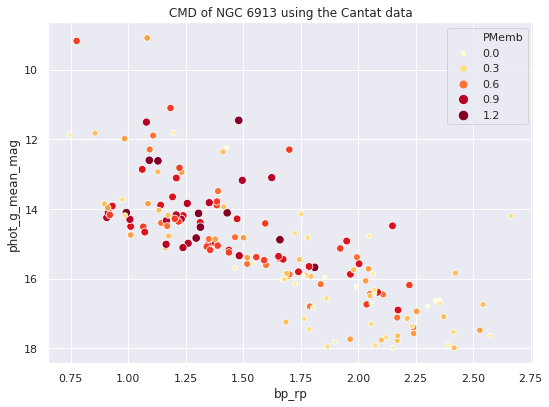

In [28]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
cmd.invert_yaxis()
plt.title('CMD of NGC 6913 using the Cantat data')
plt.show()

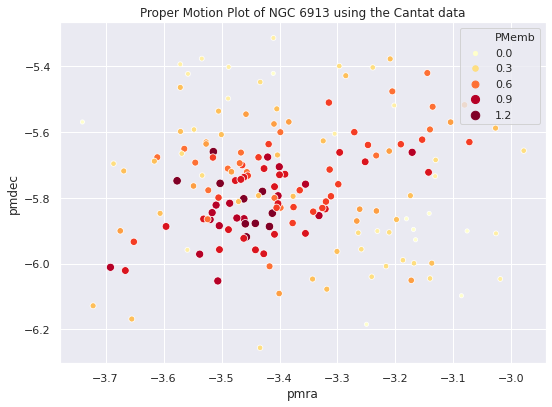

In [29]:
# proper motion plot marked with the membership probabilities of the stars 

pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
plt.title('Proper Motion Plot of NGC 6913 using the Cantat data')
plt.show()

In [30]:
# Use Random Forest on whole dataset using 100 different trees 
rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [31]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfr.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

pmdec                  0.249284
pmra                   0.128208
phot_g_mean_mag        0.088231
dec_error              0.085103
pmdec_error            0.081697
parallax_error         0.076773
dist_6913_center       0.053332
bp_rp                  0.051499
ra_error               0.041608
parallax               0.036243
dec                    0.031600
ra                     0.030324
pmra_error             0.023948
parallax_over_error    0.022150
dtype: float64

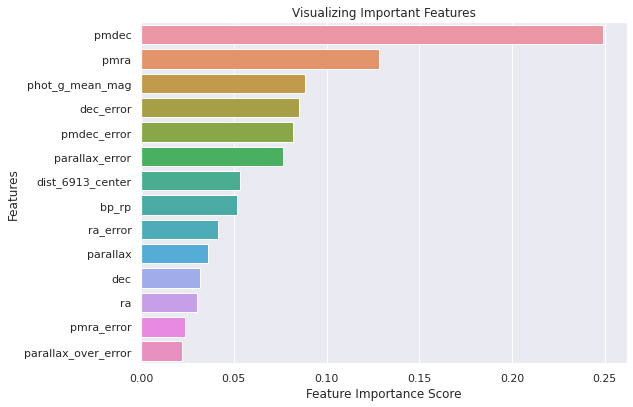

In [32]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Estimating the Model Accuracy in Test Data

In [0]:
# function for splitting a given dataset into training and test dataset

import random
# X = predictors, Y = target
def test_train_split(X, Y, test_ratio):
  ntest = int(len(X)*test_ratio) 
  ntrain = int(len(X) - ntest)

  # randomly select ntest number of rows from the full dataset as test_index and mark others as train_index.
  ind_test = random.sample(range(len(X)), k = ntest)
  ind_train = list(set(range(len(X))) - set(ind_test))

  # test and train dataset has the observations of test_indices and train_indices respectively
  test_X = X.iloc[ind_test]
  test_Y = Y.iloc[ind_test]

  train_X = X.iloc[ind_train]
  train_Y = Y.iloc[ind_train]

  return test_X, test_Y, train_X, train_Y

In [0]:
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
test_features, test_targets, train_features, train_targets = test_train_split(features, targets, 0.3)


In [35]:
# train the model using only training subset
rfr.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
# find the accuracy rate to predict the outcome for test subset
test_predict = rfr.predict(test_features)
rfr.score(test_features, test_targets)

0.5660895535683628

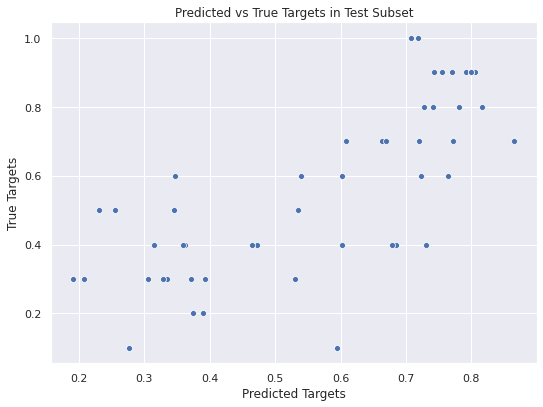

In [37]:
# plot Predicted vs True Targets in Test Subset

sns.scatterplot(test_predict, test_targets)
plt.title('Predicted vs True Targets in Test Subset')
plt.ylabel('True Targets')
plt.xlabel('Predicted Targets')
plt.show()

In [38]:
# Check with different test ratio

test_ratio = np.linspace(0.95, 0.05, 19)
print(test_ratio)

[0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35 0.3
 0.25 0.2  0.15 0.1  0.05]


In [39]:
# for each test_ratio, estimate the accuracy of the model

accuracy_rate = []

rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)

for ratio in test_ratio:
  
  accuracy = 0
  for iter in range(20):
    test_features, test_targets, train_features, train_targets = test_train_split(features, targets, ratio)

    # train the model using only training subset
    rfr.fit(train_features, train_targets)

    # find the accuracy rate to predict the outcome for test subset
    test_predict = rfr.predict(test_features)
    accuracy += rfr.score(test_features, test_targets)

  accuracy_rate.append(accuracy/20)

print(accuracy_rate)

[0.09482868310826724, 0.15072599741697335, 0.2179248315478855, 0.266972997640816, 0.31962400962411247, 0.33722197888714295, 0.38394880418215616, 0.42254019803479065, 0.4494223807985704, 0.4316636775744585, 0.47562526577841036, 0.511462531619818, 0.5091088354128204, 0.5047869618304024, 0.4917187774332018, 0.5567277102696578, 0.5398792494798788, 0.4878444499986555, 0.3757092134726075]


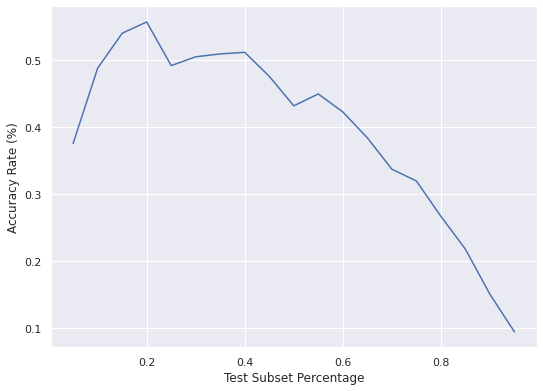

In [40]:
# plotting the accuracy rate vs test-ratio

sns.lineplot(test_ratio, accuracy_rate)
plt.xlabel('Test Subset Percentage')
plt.ylabel('Accuracy Rate (%)')
plt.show()

### Prediction of PMemb for the new stars

In [41]:
# descriptive stats
all_stars.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist
count,5.270900e+04,5.270900e+04,5.270900e+04,52709.0,52709.000000,52709.000000,52709.000000,52709.000000,45344.000000,45344.000000,45344.000000,45344.000000,45344.000000,45344.000000,45344.000000,52709.000000,45344.000000,45344.000000,45344.000000,45344.000000,45344.000000,45344.000000,45344.000000,45344.000000,45344.000000,52709.000000,52709.000000,52709.000000,52709.000000,52709.000000,5.270900e+04,52709.000000,52709.000000,52709.000000,52709.000000,45295.000000,45295.000000,52709.000000,52709.000000,52709.000000,...,45825.000000,45825.000000,52709.000000,4.586000e+04,45860.000000,45860.000000,45860.000000,45819.000000,52709.000000,45819.000000,45825.000000,45860.000000,500.000000,500.000000,52709.000000,500.00000,500.000000,500.000000,52709.000000,52709.000000,52709.000000,52709.000000,5266.000000,5266.000000,5266.000000,5266.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,3864.0,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,52709.000000
mean,1.635721e+18,2.060794e+18,8.461957e+08,2015.5,305.876560,0.699262,38.505171,0.997479,0.495123,0.516078,4.032076,-2.341114,0.833932,-4.754359,1.053172,-0.035796,0.052444,-0.160398,-0.022385,0.145487,-0.044255,-0.314977,-0.072485,0.037467,-0.017589,202.915157,1.725531,201.811968,1.103189,4.010517,1.023915e+03,1.468125,25.626279,27.087575,3.186959,1.318058,0.110349,0.069963,23.344875,13.386822,...,42.882442,20.113907,19.664194,7.761828e+03,44.825905,113.489479,17.841560,1.825967,0.186799,2.273251,0.954444,1.318993,-18.336916,3.242168,0.074712,5201.00000,3.361000,-0.117000,76.853077,0.663001,323.925432,55.429897,100566.739651,4285.889160,4077.179688,4633.604980,1.857101,1.643828,2.107472,0.936033,0.825391,1.066164,200111.0,2.905676,2.501579,3.194576,7.554704,6.752995,8.356404,0.341091
std,0.000000e+00,1.232697e+15,4.894028e+08,0.0,0.318296,1.535509,0.245336,2.028192,0.989797,0.455733,11.726740,3.980104,0.722979,4.898918,0.992014,0.186825,0.199159,0.146547,0.096748,0.186546,0.104089,0.168534,0.147002,0.127759,0.119172,67.658592,20.149939,67.388556,1.538086,14.979321,4.600932e+04,1.953470,1101.996696,9.707864,23.672728,0.168125,0.090582,0.084088,7.589086,3.412398,...,130.611099,1.638466,9.820815,2.425573e+05,4612.687403,207.387314,1.540188,0.450562,0.539176,0.626385,0.586970,0.254236,26.142706,3.648407,0.816881,704.51593,0.501678,0.402659,0.234206,0.259578,0.420539,0.255480,3444.671394,674.211609,687.853455,665.132629,0.982990,0.983607,0.978069,0.499074,0.497986,0.500191,0.0,3.690780,3.306347,4.030173,57.882702,52.682602,63.109264,0.114721
min,1.635721e+18,2.058100e+18,1.855000e+03,2015.5,305.344691,0.010482,38.023730,0.011774,-16.56130

In [0]:
### adding their distance from the center of the clusters

## NGC 6913
center = coord.SkyCoord.from_name('NGC6913')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( (all_stars['ra'] - center_ra)**2 + (all_stars['dec'] - center_dec)**2 )
all_stars['dist_6913_center'] = distance

In [0]:
all_stars = all_stars.dropna(subset = feature_columns)

In [0]:
# select the set of predictor variables from the new dataset
new_features = all_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [45]:
# train the model again using all the features and targets of the previous dataset
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
# estimate the membership probability of the stars
all_stars['PMemb'] = rfr.predict(new_features)
sum(all_stars['PMemb'] >= 0.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


649

In [47]:
potentialMember = all_stars[all_stars['PMemb'] >= 0.5]
len(potentialMember)

649

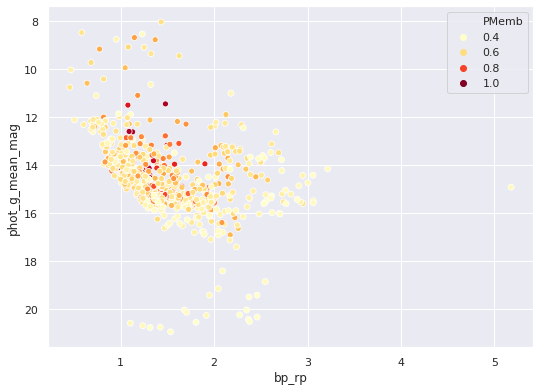

In [48]:
# CMD of probable members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.5] )
cmd.invert_yaxis()

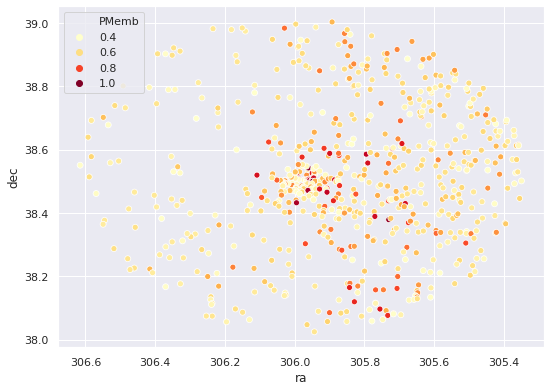

In [49]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

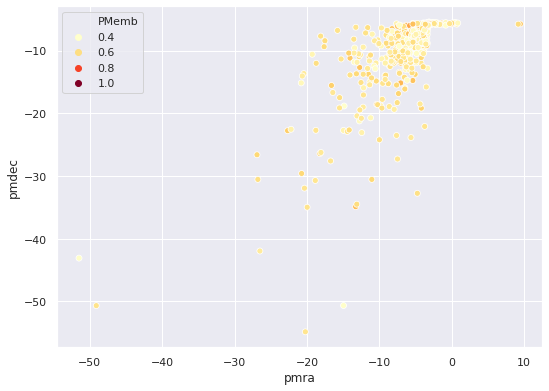

In [50]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.5] )

In [51]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_6913_center,PMemb
count,6.490000e+02,6.490000e+02,6.490000e+02,649.0,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,6.490000e+02,649.0,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,6.490000e+02,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,95.000000,95.000000,649.000000,95.000000,95.000000,95.000000,649.000000,649.000000,649.000000,649.000000,626.000000,626.000000,626.000000,626.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,606.0,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,649.000000,649.000000,649.000000
mean,1.635721e+18,2.060967e+18,8.662040e+08,2015.5,305.850488,0.036283,38.506687,0.041522,0.857243,0.049774,34.416668,-5.899038,0.083810,-9.036289,0.091737,-0.049599,0.041355,-0.162953,-0.049079,0.192979,-0.082738,-0.270279,-0.151976,-0.037779,-0.043229,258.033898,29.824345,256.785824,1.248074,0.391547,298.109467,0.071445,2.285906e+00,31.0,61.800018,1.472989,0.010818,0.043616,29.471495,16.155624,...,28.171032,1.266231e+05,221.824449,783.056641,13.776664,1.326338,0.191063,1.525455,0.707053,0.818402,-9.106228,3.067855,1.141757,5178.947266,3.421053,-0.110526,76.842504,0.680562,323.893764,55.439735,100039.536741,4628.844727,4449.090820,4916.391602,1.358471,1.145094,1.653882,0.676678,0.568764,0.832171,200111.0,3.974035,3.520010,4.320599,16.249250,14.874288,17.624191,0.290309,0.334763,0.613105
std,0.000000e+00,1.024841e+15,4.884007e+08,0.0,0.275951,0.103379,0.222069,0.108784,0.633806,0.143252,29.779863,4.844526,0.258083,6.051331,0.293025,0.075779,0.134930,0.095398,0.062777,0.114319,0.060672,0.122832,0.086331,0.083505,0.071990,25.278671,81.524233,25.140937,1.769538,6.538001,494.671265,0.301215,1.977447e+01,0.0,88.178688,0.099435,0.028862,0.047659,2.773809,1.089570,...,3.617946,6.338091e+05,1615.200474,359.280060,1.567182,0.189400,0.393442,0.528342,0.339858,0.230269,22.641850,3.517707,3.001275,647.892578,0.566418,0.393963,0.213672,0.224262,0.373268,0.226042,575.597726,652.802856,672.061768,644.548340,0.961959,0.927008,1.026451,0.483770,0.464298,0.524140,0.0,4.984539,4.606273,5.350840,90.865318,83.978561,97.757950,0.150379,0.176571,0.090568
min,1.635721e+18,2.058103e+18,4.964287e+06,2015.5,305.349273,0.010657,38.024912,0.011774,-1.481800,0.014355,-1.332946,-51.478014,0.022819,-54.837606,0.022228,-0.400042,-0.394684,-0.575193,-0.264883,-0.262658,-0.239207,-0.749702,-0.404260,-0.297070,-0.252899,92

In [52]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_6913_center
count,1.700000e+02,1.700000e+02,1.700000e+02,170.0,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.0,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,1.690000e+02,169.000000,169.000000,169.000000,169.000000,170.000000,169.000000,169.000000,169.000000,1.000000,1.000000,170.000000,1.0,1.0,1.0,170.000000,170.000000,170.000000,170.000000,145.000000,145.000000,145.000000,145.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,144.0,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,170.000000,170.000000,170.000000
mean,1.635721e+18,2.061104e+18,8.991247e+08,2015.5,305.916874,0.030140,38.498505,0.036322,0.549987,0.041139,18.595560,-3.380745,0.067076,-5.764726,0.074174,-0.052862,0.047154,-0.138174,-0.051963,0.178949,-0.087508,-0.279096,-0.162469,-0.028793,-0.032876,261.029412,31.388235,259.623529,1.405882,-0.452034,251.052277,0.048083,0.398448,31.0,57.397316,1.461027,0.009230,0.062775,29.729412,16.105882,...,28.100000,7.444622e+04,113.394450,690.067383,14.236567,1.320751,0.176471,1.606532,0.757240,0.849291,-17.989237,5.377616,0.035294,5000.0,3.0,0.0,76.865400,0.633193,323.971153,55.411141,100001.193103,4521.335938,4340.726562,4858.288574,2.151746,1.871649,2.629261,1.076579,0.928603,1.343582,200111.0,4.154220,3.680255,4.482897,15.790257,14.470527,17.109993,0.155467,0.561765,0.177296
std,0.000000e+00,3.270528e+14,4.883002e+08,0.0,0.142852,0.021423,0.125399,0.026414,0.031147,0.028844,8.643813,0.162431,0.048570,0.184031,0.055731,0.074475,0.128318,0.103372,0.062765,0.135922,0.061610,0.135682,0.085144,0.094080,0.076245,22.651574,86.893881,22.167718,2.222790,3.340387,79.192787,0.099826,1.263057,0.0,97.824677,0.079588,0.006703,0.040093,2.543762,0.979355,...,4.361817,3.264491e+05,603.299153,393.197235,1.571638,0.072689,0.397521,0.452540,0.271826,0.183238,NaN,NaN,0.460179,NaN,NaN,NaN,0.113765,0.123647,0.190410,0.128638,0.396102,556.623779,550.933777,521.955872,0.770660,0.725869,0.540000,0.391130,0.365506,0.281625,0.0,3.504805,3.357561,3.662597,61.949299,57.375221,66.523674,0.085152,0.257680,0.097851
min,1.635721e+18,2.058110e+18,1.723005e+06,2015.5,305.636921,0.011508,38.261299,0.013074,0.479977,0.015596,3.813220,-3.740193,0.025444,-6.255921,0.027417,-0.256366,-0.394684,-0.369383,-0.213974,-0.214332,-0.228630,-0.749702,-0.336544,-0.197922,-0.274328,197.000000,0.000000,196.000000,0.000000,-8.638947,106.939201,0.000000,0.000000,31.0,0.857

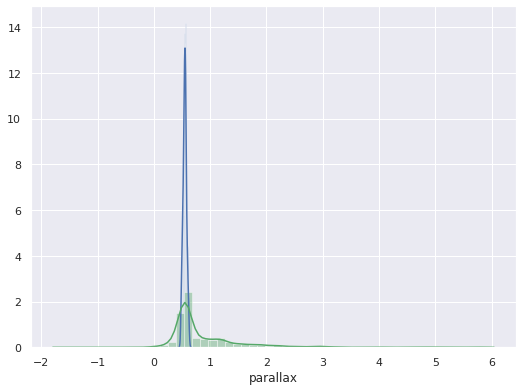

In [53]:
sns.distplot(member['parallax'], color = 'b')
sns.distplot(potentialMember['parallax'], color = 'g')

In [0]:
# saving the files as csv

# all_stars.to_csv('gaia_6913_membership_prob.csv')
potentialMember.to_csv('NGC_6913_membership_prob.csv')

### Comparing the new and old probable members

In [0]:
# creating subset for the potential member in previous dataset

potential_Old_Member = member[member['PMemb'] >= 0.5]


concatenated = pd.concat([potentialMember.assign(dataset='New_member'), potential_Old_Member.assign(dataset='Old_member')])


In [56]:
concatenated

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,dist_6913_center,PMemb,dataset
11,1635721458409799680,b'Gaia DR2 2061130173722074752',2061130173722074752,1538478204,2015.5,305.986009,0.016975,38.530441,0.018511,1.241630,0.022566,55.021400,-6.244627,0.035461,-6.518208,0.037100,-0.100773,-0.067763,0.027560,0.014181,0.278287,-0.045803,-0.253144,-0.172472,-0.017425,-0.042418,220,0,219,1,-3.586760,147.521820,0.0,0.0,31,False,46.349266,1.526565,0.004963,0.049547,...,13.600363,1.238871,0,1.185640,0.521534,0.664106,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',76.922525,0.607214,324.081056,55.418072,100001.0,4917.666504,4867.000000,5089.250000,1.067,0.6359,1.2978,0.4967,0.313,0.6201,200111.0,1.424892,1.330432,1.454714,1.069782,1.018850,1.120714,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.007402,0.007595,0.658,New_member
29,1635721458409799680,b'Gaia DR2 2061130139362333824',2061130139362333824,954418691,2015.5,305.990473,0.013010,38.514351,0.014309,0.542993,0.017657,30.752131,-3.402550,0.029173,-5.793631,0.029298,-0.121473,0.013768,-0.120340,-0.001874,0.249431,-0.026708,-0.117860,-0.100446,-0.117522,-0.106875,275,0,275,0,-4.420243,179.250107,0.0,0.0,31,False,68.874550,1.517808,0.003702,0.051634,...,13.131310,1.262399,1,1.257004,0.546887,0.710116,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',76.911361,0.595112,324.074993,55.401971,100002.0,4813.937012,4715.242676,4982.020020,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,4.187072,3.909311,4.364184,8.482368,7.701898,9.262839,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.010579,0.011474,0.866,New_member
39,1635721458409799680,b'Gaia DR2 2061130173722072320',2061130173722072320,1141266204,2015.5,305.998644,0.033662,38.527390,0.022625,0.507027,0.034273,14.793980,-3.190718,0.081669,-5.637011,0.045854,-0.146535,-0.394684,0.417441,0.130678,0.264738,-0.031606,-0.128072,-0.211356,-0.191511,0.091486,197,0,196,1,-1.613617,160.571564,0.0,0.0,31,False,21.751890,1.494739,0.007018,0.083249,...,14.249866,1.320299,0,1.387800,0.584863,0.802938,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',76.925706,0.597371,324.094710,55.411221,100001.0,4492.000000,4425.500000,4906.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,3.112038,2.608971,3.206267,3.552577,2.987486,4.117669,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.012639,0.015839,0.652,New_member
45,1635721458409799680,b'Gaia DR2 2061130173722073088',2061130173722073088,710207184,2015.5,305.998073,0.023091,38.529978,0.024828,0.635691,0.031632,20.096245,-3.511168,0.047161,-5.712824,0.047699,-0.048973,0.051647,-0.083257,-0.036908,0.363090,-0.075687,-0.163398,-0.140332,-0.167991,-0.094225,236,236,225,11,6.271167,378.547241,0.0,0.0,31,True,289.349091,1.559167,0.006673,0.081806,...,9.354053,1.219896,0,1.049547,0.454020,0.595528,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',76.927568,0.599224,324.095871,55.413764,100001.0,50

In [57]:
concatenated.dataset.value_counts()

New_member    649
Old_member    105
Name: dataset, dtype: int64

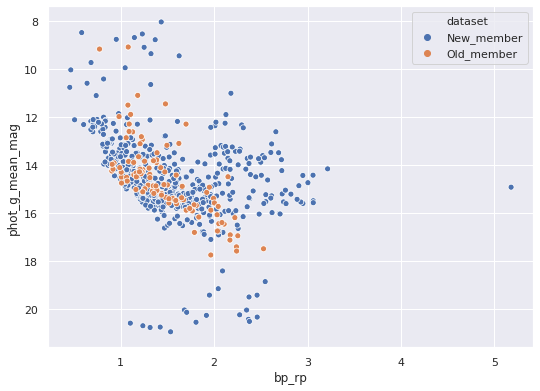

In [58]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

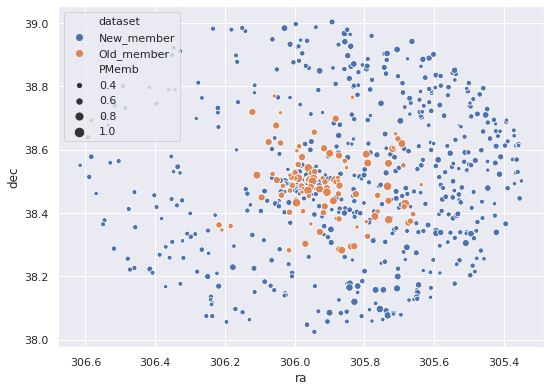

In [59]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                size='PMemb', hue='dataset')
skyplot.invert_xaxis()

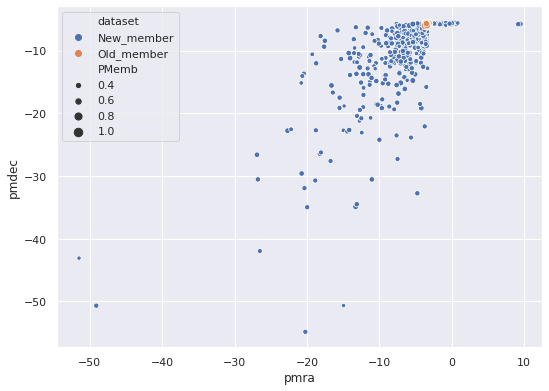

In [60]:
# proper motion plot

sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                size='PMemb', hue='dataset')

In [0]:
# pd_prof.ProfileReport(potentialMember)

In [0]:
import time
time.sleep(150)

In [0]:
files.download('NGC_6913_cantat.csv')
files.download('NGC_6913_membership_prob.csv')